<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/Truck_Volume_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
# Import CCD from google drive Source: Census
ccd_name = "/content/drive/My Drive/FreightProfiles/tl_rd22_10_cousub (1)/tl_rd22_10_cousub.shp"
ccd =  gpd.read_file(ccd_name)
ccd = ccd.to_crs("EPSG:2235")
# Import tracks from google drive
# Source: Fist Maps
# https://de-firstmap-delaware.hub.arcgis.com/datasets/railroad-rail-lines/explore?location=39.655622%2C-75.765561%2C13.56
rail_name = "/content/drive/MyDrive/FreightProfiles/Delaware_Multimodal_2.0_tracks/Delaware_Multimodal_2.0.shp"
rail = gpd.read_file(rail_name)
rail = rail.to_crs("EPSG:2235")
cols = ['NAME','geometry']
ccd = ccd[cols]
cols = ['TRACK_TYPE', 'STATUS', 'LINE_ID', 'OWNER', 'geometry']
rail = rail[cols]

In [154]:
taz_name = "/content/drive/MyDrive/temp_dstep23/TAZ_analysis/DE_TAZ_2021_TRKGEN_region.shp"
taz = gpd.read_file(taz_name)
taz = taz.to_crs("EPSG:2235")

In [155]:
taz["FIS"] = taz['TRN_UTL_20'] + taz['LE_HOSP_20'] + taz['CONS_20'] + taz['MANU_20']
taz["SIS"] = taz['OT_SVCS_20'] + taz['ED_HEALTH_'] + taz['FINANCE_20'] + taz['PRO_BUS_20'] + taz['LE_HOSP_20'] + taz['INFO_20']
taz["FIS_per"] = taz["FIS"]/taz['TOT_20']*100
taz_grpd = taz.groupby("CCD").sum(numeric_only = True)
taz_grpd["FIS_per"] = taz_grpd["FIS"]/taz_grpd["TOT_20"]*100
taz_grpd["FIS_capita"] = taz_grpd["FIS"]/taz_grpd["POP_20"]
taz_grpd.reset_index(inplace=True)
taz_grpd.at[ 9, "CCD"] = "Lower Christiana"
taz_grpd.at[25, "CCD"] = "Upper Christiana"
taz_grpd.at[12, "CCD"] = "Middletown-Odessa"
taz_grpd.at[20, "CCD"] = "Pike Creek-Central Kirkwood"
ccd = ccd.merge(taz_grpd, left_on="NAME", right_on="CCD")

In [156]:
CFC = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0 (1)/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0.shp")
CFC = CFC.to_crs("EPSG:2235")

In [157]:
CFC['FREIGHT_NE'].unique()

array(['CUFC', 'CRFC', 'PFN'], dtype=object)

In [158]:
CoastalCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/CoastalCorridor/Delaware_Multimodal_2.0.shp")
CoastalCorridor = CoastalCorridor.to_crs("EPSG:2235")

MetroCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/MetroCorridor/Delaware_Multimodal_2.0.shp")
MetroCorridor = MetroCorridor.to_crs("EPSG:2235")

LewesCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/LewesCorridor/Delaware_Multimodal_2.0.shp")
LewesCorridor = LewesCorridor.to_crs("EPSG:2235")

BayCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/BayCorridor/Delaware_Multimodal_2.0.shp")
BayCorridor = BayCorridor.to_crs("EPSG:2235")

PiedmontCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/PiedmontCorridor/Delaware_Multimodal_2.0.shp")
PiedmontCorridor = PiedmontCorridor.to_crs("EPSG:2235")

In [159]:
truck_traffic = pd.read_csv("/content/drive/MyDrive/FreightProfiles/StreetLight/1635943_All_CCDsAvailable_trucks/1635943_All_CCDsAvailable_trucks_odg_comm.csv")

In [160]:
cols = ['Vehicle Weight', 'Origin Zone ID', 'Origin Zone Name',
        'Origin Zone Source', 'Destination Zone ID', 'Destination Zone Name',
        'Destination Zone Source', 'Day Type', 'Day Part',
        'Average Daily O-D Traffic (StL Index)',
        'Average Daily Origin Zone Traffic (StL Index)',
       'Average Daily Destination Zone Traffic (StL Index)',
       'Avg Travel Time (sec)']

In [161]:
truck_traffic = truck_traffic[cols]

In [162]:
ccd["NAME"].values

array(['Lewes', 'Millsboro', 'Central Kent', 'Smyrna',
       'Middletown-Odessa', 'New Castle', 'Pike Creek-Central Kirkwood',
       'Wilmington', 'Lower Christiana', 'Piedmont', 'Upper Christiana',
       'Georgetown', 'Milford South', 'Seaford', 'Selbyville-Frankford',
       'Laurel-Delmar', 'Milton', 'Bridgeville-Greenwood', 'Dover',
       'Kenton', 'Felton', 'Milford North', 'Harrington', 'Brandywine',
       'Glasgow', 'Red Lion', 'Newark'], dtype=object)

In [163]:
truck_traffic2 = truck_traffic[truck_traffic["Day Type"]=="0: All Days (M-Su)"][truck_traffic['Day Part']=="00: All Day (12am-12am)"][truck_traffic['Vehicle Weight']=="Heavy"].groupby("Destination Zone Name").sum(numeric_only=True).reset_index()

<ipython-input-163-c6cb3cecffb3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  truck_traffic2 = truck_traffic[truck_traffic["Day Type"]=="0: All Days (M-Su)"][truck_traffic['Day Part']=="00: All Day (12am-12am)"][truck_traffic['Vehicle Weight']=="Heavy"].groupby("Destination Zone Name").sum(numeric_only=True).reset_index()


In [164]:
truck_traffic_ccd = truck_traffic2[truck_traffic2["Destination Zone Name"].isin(ccd["NAME"].values)][['Destination Zone Name', 'Average Daily O-D Traffic (StL Index)']]

In [165]:
truck_traffic_ccd

,Destination Zone Name,Average Daily O-D Traffic (StL Index)
7218,Brandywine,30298
7219,Glasgow,14773
7220,Lower Christiana,10172
7221,Middletown-Odessa,28067
7222,New Castle,120256
7223,Newark,14722
7224,Piedmont,2591
7225,Pike Creek-Central Kirkwood,5050
7226,Red Lion,40566
7227,Upper Christiana,25262


In [166]:
ccd  = ccd.merge(truck_traffic_ccd, left_on="CCD", right_on="Destination Zone Name")

<Axes: xlabel='POP_20', ylabel='Average Daily O-D Traffic (StL Index)'>

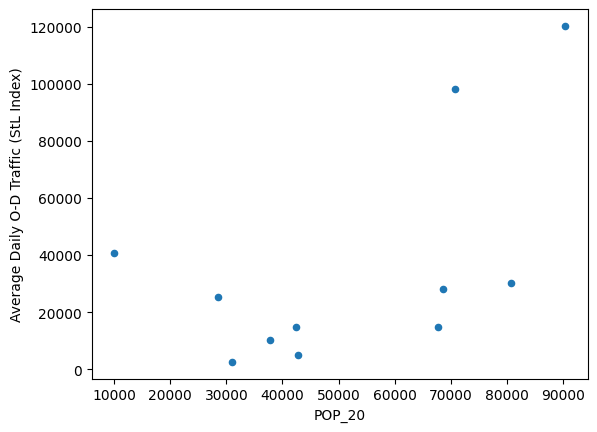

In [167]:
ccd.plot(x="POP_20",y="Average Daily O-D Traffic (StL Index)", kind="scatter")

<Axes: xlabel='FIS_capita', ylabel='Average Daily O-D Traffic (StL Index)'>

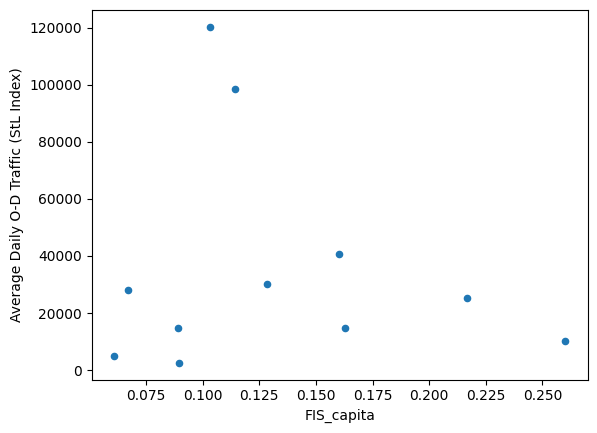

In [168]:
ccd.plot(x="FIS_capita",y="Average Daily O-D Traffic (StL Index)", kind="scatter")

In [169]:
ccd.columns

Index(['NAME', 'geometry', 'CCD', 'POP_20', 'TOT_Units_', 'Occ_HH_20',
       'Vacant_20', 'Tot_GC_20', 'TOT_Inst_2', 'TOT_nonins', 'NATRES_20',
       'CONS_20', 'MANU_20', 'WHL_RET_20', 'TRN_UTL_20', 'INFO_20',
       'FINANCE_20', 'PRO_BUS_20', 'ED_HEALTH_', 'LE_HOSP_20', 'OT_SVCS_20',
       'PUBADM_20', 'FOOD_SVC_2', 'FIS_20', 'TOT_20', 'EMP_19', 'Adj_EMP_20',
       'FIS', 'SIS', 'FIS_per', 'FIS_capita', 'Destination Zone Name',
       'Average Daily O-D Traffic (StL Index)'],
      dtype='object')

In [170]:
gpd.overlay(CFC, ccd, how="intersection").length
gpd.overlay(PiedmontCorridor, ccd, how="intersection").length
gpd.overlay(CoastalCorridor, ccd, how="intersection").length
gpd.overlay(MetroCorridor, ccd, how="intersection").length
gpd.overlay(LewesCorridor, ccd, how="intersection").length
gpd.overlay(BayCorridor, ccd, how="intersection").length

0    59204.299611
1    24259.128666
dtype: float64

In [171]:
CFC_ccd = gpd.overlay(CFC, ccd, how="intersection")
CFC_ccd["length_CFC"] = CFC_ccd.length
CFC_ccd = CFC_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_CFC"]]

In [172]:
PiedmontCorridor_ccd = gpd.overlay(PiedmontCorridor, ccd, how="intersection", keep_geom_type=True)
PiedmontCorridor_ccd["length_Piedmont"] = PiedmontCorridor_ccd.length
PiedmontCorridor_ccd = PiedmontCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Piedmont"]]

In [173]:
CoastalCorridor_ccd = gpd.overlay(CoastalCorridor, ccd, how="intersection", keep_geom_type=True)
CoastalCorridor_ccd["length_Coastal"] = CoastalCorridor_ccd.length
CoastalCorridor_ccd = CoastalCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Coastal"]]

In [174]:
MetroCorridor_ccd = gpd.overlay(MetroCorridor, ccd, how="intersection", keep_geom_type=True)
MetroCorridor_ccd["length_Metro"] = MetroCorridor_ccd.length
MetroCorridor_ccd = MetroCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Metro"]]

In [175]:
LewesCorridor_ccd = gpd.overlay(LewesCorridor, ccd, how="intersection", keep_geom_type=True)
LewesCorridor_ccd["length_Lewes"] = LewesCorridor_ccd.length
LewesCorridor_ccd = LewesCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Lewes"]]

In [176]:
BayCorridor_ccd = gpd.overlay(BayCorridor, ccd, how="intersection", keep_geom_type=True)
BayCorridor_ccd["length_Bay"] = BayCorridor_ccd.length
BayCorridor_ccd = BayCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Bay"]]

In [177]:
ccd = ccd.merge(CFC_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(PiedmontCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(CoastalCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(MetroCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(LewesCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(BayCorridor_ccd, left_on="CCD", right_on="NAME", how="outer").fillna(0)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1569: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NAME_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1569: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NAME_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


In [178]:
ccd["freight_length"] = ccd["length_CFC"] + ccd["length_Piedmont"] + ccd["length_Coastal"] + ccd["length_Metro"] + ccd["length_Lewes"] + ccd["length_Bay"]

In [180]:
ccd.drop(columns=["NAME", "NAME_x", "NAME_y"])

,geometry,CCD,POP_20,TOT_Units_,Occ_HH_20,Vacant_20,Tot_GC_20,TOT_Inst_2,TOT_nonins,NATRES_20,...,FIS_capita,Destination Zone Name,Average Daily O-D Traffic (StL Index),length_CFC,length_Piedmont,length_Coastal,length_Metro,length_Lewes,length_Bay,freight_length
0,"POLYGON ((553862.512 559465.639, 554474.833 55...",Middletown-Odessa,68675,23427,22558,869,2340,1737,603,37,...,0.066968,Middletown-Odessa,28067,136797.635176,0.000000,198278.687068,0.000000,0.0,59204.299611,394280.621855
1,"POLYGON ((574633.246 594931.918, 574635.550 59...",New Castle,90410,36383,34665,1718,618,510,108,54,...,0.103418,New Castle,120256,142284.875030,32185.299743,57645.308681,122855.827195,0.0,0.000000,354971.310649
2,"POLYGON ((571372.808 635840.297, 571424.085 63...",Pike Creek-Central Kirkwood,42813,18310,17596,714,536,229,307,0,...,0.061010,Pike Creek-Central Kirkwood,5050,0.000000,5566.094098,0.000000,0.000000,0.0,0.000000,5566.094098
3,"POLYGON ((607869.749 638394.344, 607890.287 63...",Wilmington,70742,33944,30043,3901,2372,1865,507,20,...,0.114161,Wilmington,98320,25139.558117,16518.666871,0.000000,36617.321084,0.0,0.000000,78275.546072
4,"POLYGON ((590493.529 619785.932, 590520.232 61...",Lower Christiana,37732,16096,15257,839,134,72,62,29,...,0.260151,Lower Christiana,10172,6149.502284,12893.098692,0.000000,5754.093127,0.0,0.000000,24796.694103
5,"POLYGON ((557934.713 633265.957, 558108.343 63...",Piedmont,30937,12201,11655,546,838,806,32,10,...,0.089569,Piedmont,2591,0.000000,25618.983358,0.000000,0.000000,0.0,0.000000,25618.983358
6,"POLYGON ((574291.937 616763.225, 574303.660 61...",Upper Christiana,28471,11443,11040,403,128,75,53,11,...,0.216536,Upper Christiana,25262,32072.987102,0.000000,7025.644515,25083.821300,0.0,0.000000,64182.452917
7,"POLYGON ((610176.847 652599.891, 610199.155 65...",Brandywine,80753,35302,33624,1678,1024,757,267,123,...,0.128330,Brandywine,30298,96428.839770,27387.863442,0.000000,68670.465538,0.0,0.000000,192487.168750
8,"POLYGON ((551650.793 597158.327, 551672.492 59...",Glasgow,42420,15966,15443,523,78,0,78,2,...,0.089062,Glasgow,14773,67542.808067,0.000000,0.000000,39743.987368,0.0,24259.128666,131545.924100
9,"POLYGON ((568764.867 561752.884, 568798.503 56...",Red Lion,10061,3548,3423,125,62,23,39,0,...,0.160223,Red Lion,40566,21435.504535,0.000000,32704.587792,0.000000,0.0,0.000000,54140.092327
